<a href="https://colab.research.google.com/github/farhan1503001/Brain-Tumor-Classification/blob/master/Brain_Tumor_Classification_with_XceptionNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import h5py
import numpy as np
import os
import cv2
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [ ]:
x_dataset=[]
y_dataset=[]
for i in range(len(os.listdir("/content/drive/My Drive/Brain Tumor type dataset"))):
    file=h5py.File("/content/drive/My Drive/Brain Tumor type dataset/"+str(i+1)+".mat",mode='r')
    Dataset=file["cjdata/image"]
    Label=file["cjdata/label"]
    x=np.array(Dataset,dtype='float32')
    y=np.array(Label,dtype='float32')
    x=scaler.fit_transform(x)
    x=np.repeat(x[:,:,np.newaxis],3,axis=2)
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
X_dataset=np.array(x_dataset)
Y_dataset=np.array(y_dataset)
Y_dataset=Y_dataset.reshape((3064,1))

Y_dataset=Y_dataset-1

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_dataset,Y_dataset,test_size=0.25)

In [ ]:
from sklearn.model_selection import KFold
folds=list(KFold(n_splits=5,shuffle=True,random_state=1).split(x_train,y_train))

In [ ]:
Inception=tf.keras.applications.InceptionV3(include_top=False,input_shape=(224,224,3))
input_image=tf.keras.layers.Input((224,224,3))
x=Inception (input_image)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(3)(x)
out=tf.keras.layers.Activation(activation='softmax')(x)

model=tf.keras.Model(inputs=input_image,outputs=out)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc,roc_curve
import matplotlib.pyplot as plt

Fold 1
Epoch 1/100
58/58 [==============================] - 22s 189ms/step - loss: 0.9283 - accuracy: 0.7134 - val_loss: 1.5639 - val_accuracy: 0.5565
Epoch 2/100
58/58 [==============================] - 10s 166ms/step - loss: 0.1589 - accuracy: 0.9488 - val_loss: 0.5077 - val_accuracy: 0.8891
Epoch 3/100
58/58 [==============================] - 10s 165ms/step - loss: 0.0543 - accuracy: 0.9875 - val_loss: 0.6467 - val_accuracy: 0.8739
Epoch 4/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0461 - accuracy: 0.9865 - val_loss: 0.3449 - val_accuracy: 0.9283
Epoch 5/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0214 - accuracy: 0.9944 - val_loss: 0.3809 - val_accuracy: 0.9304
Epoch 6/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0166 - accuracy: 0.9959 - val_loss: 0.3998 - val_accuracy: 0.9304
Epoch 7/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0431 - accuracy: 0.9847 - val_loss: 0.3797 - val_ac

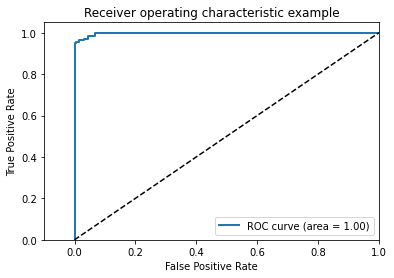

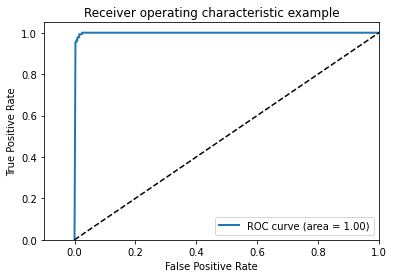

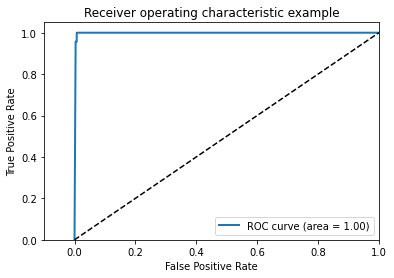

Fold 2
Epoch 1/100
58/58 [==============================] - 10s 167ms/step - loss: 0.0873 - accuracy: 0.9908 - val_loss: 2.1991e-05 - val_accuracy: 1.0000
Epoch 2/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0521 - accuracy: 0.9924 - val_loss: 0.0220 - val_accuracy: 0.9978
Epoch 3/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0109 - accuracy: 0.9978 - val_loss: 0.0619 - val_accuracy: 0.9978
Epoch 4/100
58/58 [==============================] - 10s 165ms/step - loss: 0.0109 - accuracy: 0.9989 - val_loss: 0.0406 - val_accuracy: 0.9978
Epoch 5/100
58/58 [==============================] - 10s 166ms/step - loss: 6.3702e-04 - accuracy: 0.9995 - val_loss: 0.0240 - val_accuracy: 0.9978
Epoch 6/100
58/58 [==============================] - 10s 166ms/step - loss: 1.6090e-05 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9978
Epoch 7/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 5.4

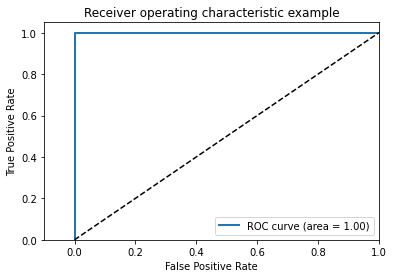

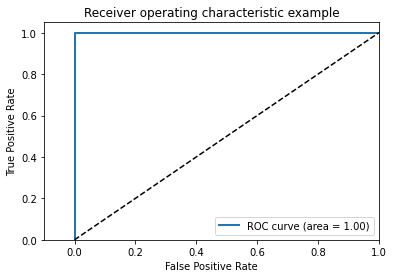

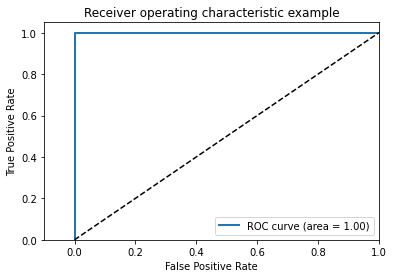

Fold 3
Epoch 1/100
58/58 [==============================] - 10s 167ms/step - loss: 5.9035e-04 - accuracy: 0.9995 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
58/58 [==============================] - 10s 166ms/step - loss: 7.8478e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
58/58 [==============================] - 10s 166ms/step - loss: 7.5917e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/100
58/58 [==============================] - 10s 166ms/step - loss: 5.1960e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/100
58/58 [==============================] - 10s 166ms/step - loss: 7.5033e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/100
58/58 [==============================] - 10s 166ms/step - loss: 6.4457e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
58/58 [==============================] - 10s 166ms/step - loss: 5.950

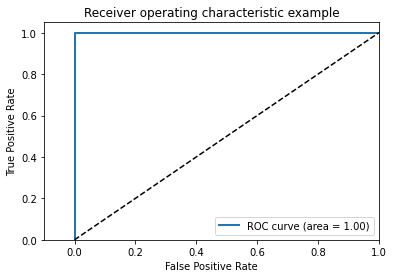

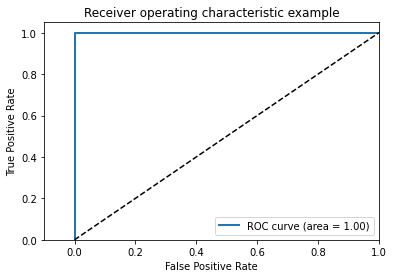

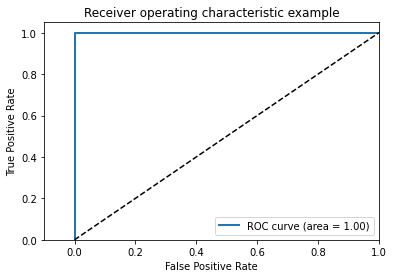

Fold 4
Epoch 1/100
58/58 [==============================] - 11s 184ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
58/58 [==============================] - 10s 166ms/step - loss: 6.4823e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/100
58/58 [==============================] - 10s 166ms/step - loss: 6.4823e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
58/58 [==============================] - 10s 166ms/step - loss: 0.000

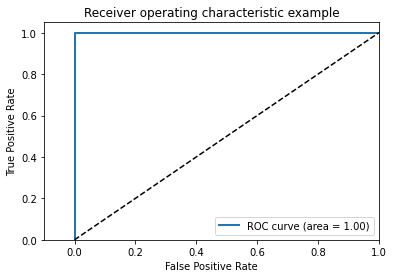

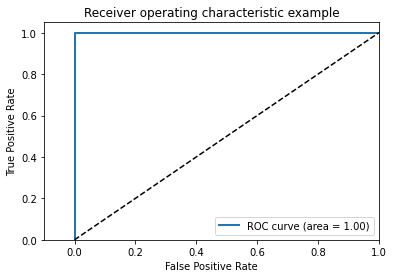

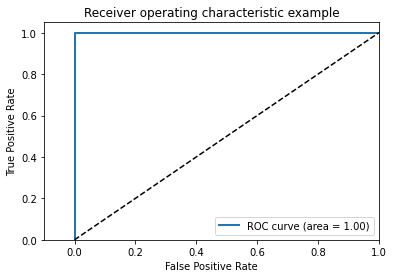

Fold 5
Epoch 1/100
58/58 [==============================] - 10s 167ms/step - loss: 3.0646e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
58/58 [==============================] - 10s 166ms/step - loss: 3.1828e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/100
58/58 [==============================] - 10s 166ms/step - loss: 6.4823e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/100
58/58 [==============================] - 10s 166ms/step - loss: 6.4823e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
58/58 [==============================] - 10s 166ms/step - loss: 3.889

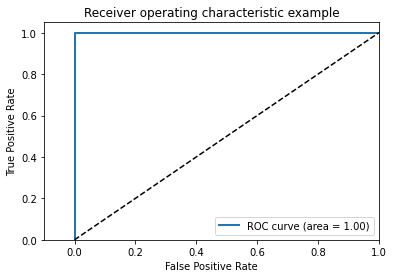

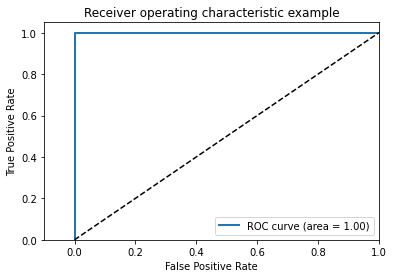

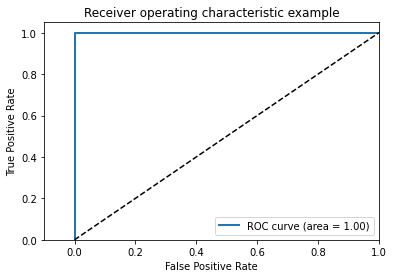

In [ ]:
History=[]
Prescore=[]
Recall=[]
F1=[]
Sensspeci=[]
Roc_auc=[]
for j,(train_idx,val_idx) in enumerate(folds):
    print("Fold "+str(j+1))
    
    x_train=X_dataset[train_idx]
    y_train=Y_dataset[train_idx]
    x_val=X_dataset[val_idx]
    y_val=Y_dataset[val_idx]
    history=model.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_val,y_val))
    y_predict=model.predict(x_val)
    Y_predict=np.argmax(y_predict,axis=1)
    l=len(y_val)
    Y_predict=np.reshape(Y_predict,(l,1))
    prescore=precision_score(y_val,Y_predict,average=None)
    recaller=recall_score(y_val,Y_predict,average=None)
    score=f1_score(y_val,Y_predict,average=None)
    sensitivity=sensitivity_specificity_support(y_val,Y_predict,average=None)
    lb=label_binarize(y_val,classes=[0,1,2])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
      fpr[i], tpr[i], _ = roc_curve(lb[:, i], y_predict[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
    
    print("Precision: ",prescore)
    print("Recall: ",recaller)
    print("F1-score ",score)
    print("Sensitivity ",sensitivity)
    History.append(history)
    Prescore.append(prescore)
    F1.append(score)
    Recall.append(recaller)
    Sensspeci.append(sensitivity)
    for i in range(3):
      plt.figure()
      plt.plot(fpr[i], tpr[i], lw=2,label='ROC curve (area = %0.2f)' % roc_auc[i])
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlim([-0.1, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver operating characteristic example')
      plt.legend(loc="lower right")
      plt.show()

In [ ]:
val_acc=History[0].history['val_accuracy']
val_acc1=History[1].history['val_accuracy']
val_acc2=History[2].history['val_accuracy']
val_acc3=History[3].history['val_accuracy']
val_acc4=History[4].history['val_accuracy']
Accuracvalid1=val_acc[99]
Accuracyvalid2=val_acc1[99]
Accuracyvalid3=val_acc2[99]
Accuracyvalid4=val_acc3[99]
Accuracyvalid5=val_acc4[99]
Mean_valid_Accuracy=(Accuracvalid1+Accuracyvalid2+Accuracyvalid3+Accuracyvalid4+Accuracyvalid5)/5.00
print("validation Accuracy for Fold-1 ",Accuracvalid1)
print("validation Accuracy for Fold-2",Accuracyvalid2)
print("Validation Accuracy for Fold-3 ",Accuracyvalid3)
print("Validation Accuracy for Fold-4  ",Accuracyvalid4)
print("Validation Accuracy for Fold-5  ",Accuracyvalid5)
print("Mean Validation Accuracy ",Mean_valid_Accuracy)

validation Accuracy for Fold-1  0.9739130139350891
validation Accuracy for Fold-2 1.0
Validation Accuracy for Fold-3  1.0
Validation Accuracy for Fold-4   1.0
Validation Accuracy for Fold-5   1.0
Mean Validation Accuracy  0.9947826027870178


In [ ]:
sample=[97.55302,99.83687,100.0,100.0,99.4452]
stdm=np.std(sample)
print(stdm)

0.9293863024254222


In [ ]:
print("Printing the precision scores and average of them")
print("Meningioma  Glioma  Pituitary Tumor")
avgm=0.0;
avgg=0.0;
avgp=0.0;
for i in range(5):
  print("Precision of Fold -1",Prescore[i])
  avgm=avgm+Prescore[i][0]
  avgg=avgg+Prescore[i][1]
  avgp=avgp+Prescore[i][2]

print("Average Meningioma ",avgm/5.0)
print("Average Glioma ",avgg/5.0)
print("Average Pituitary ",avgp/5.0)



Printing the precision scores and average of them
Meningioma  Glioma  Pituitary Tumor
Precision of Fold -1 [0.96428571 0.96296296 0.98918919]
Precision of Fold -1 [1. 1. 1.]
Precision of Fold -1 [1. 1. 1.]
Precision of Fold -1 [1. 1. 1.]
Precision of Fold -1 [1. 1. 1.]
Average Meningioma  0.9928571428571429
Average Glioma  0.9925925925925926
Average Pituitary  0.9978378378378379


In [ ]:
print("Printing the Recall scores and average of them")
print("Meningioma  Glioma  Pituitary Tumor")
avgm=0.0;
avgg=0.0;
avgp=0.0;
for i in range(5):
  print("Precision of Fold -1",Recall[i])
  avgm=avgm+Recall[i][0]
  avgg=avgg+Recall[i][1]
  avgp=avgp+Recall[i][2]

print("Average Meningioma ",avgm/5.0)
print("Average Glioma ",avgg/5.0)
print("Average Pituitary ",avgp/5.0)

Printing the Recall scores and average of them
Meningioma  Glioma  Pituitary Tumor
Precision of Fold -1 [0.95744681 0.97744361 0.98387097]
Precision of Fold -1 [1. 1. 1.]
Precision of Fold -1 [1. 1. 1.]
Precision of Fold -1 [1. 1. 1.]
Precision of Fold -1 [1. 1. 1.]
Average Meningioma  0.9914893617021278
Average Glioma  0.9954887218045112
Average Pituitary  0.9967741935483871


In [ ]:
print("Printing the F-1 scores and average of them")
print("Meningioma  Glioma  Pituitary Tumor")
avgm=0.0;
avgg=0.0;
avgp=0.0;
for i in range(5):
  print("Precision of Fold -1",F1[i])
  avgm=avgm+F1[i][0]
  avgg=avgg+F1[i][1]
  avgp=avgp+F1[i][2]

print("Average Meningioma ",avgm/5.0)
print("Average Glioma ",avgg/5.0)
print("Average Pituitary ",avgp/5.0)

Printing the F-1 scores and average of them
Meningioma  Glioma  Pituitary Tumor
Precision of Fold -1 [0.96085409 0.97014925 0.98652291]
Precision of Fold -1 [1. 1. 1.]
Precision of Fold -1 [1. 1. 1.]
Precision of Fold -1 [1. 1. 1.]
Precision of Fold -1 [1. 1. 1.]
Average Meningioma  0.9921708185053382
Average Glioma  0.9940298507462686
Average Pituitary  0.9973045822102427


In [ ]:
print("Printing the Specificity and average of them")
print("Meningioma  Glioma  Pituitary Tumor")
avgm=0.0;
avgg=0.0;
avgp=0.0;
for i in range(5):
  print("Precision of Fold -1",Sensspeci[i][1])
  avgm=avgm+Sensspeci[i][1][0]
  avgg=avgg+Sensspeci[i][1][1]
  avgp=avgp+Sensspeci[i][1][2]

print("Average Meningioma ",avgm/5.0)
print("Average Glioma ",avgg/5.0)
print("Average Pituitary ",avgp/5.0)

Printing the Specificity and average of them
Meningioma  Glioma  Pituitary Tumor
Precision of Fold -1 [0.98432602 0.98470948 0.99270073]
Precision of Fold -1 [1. 1. 1.]
Precision of Fold -1 [1. 1. 1.]
Precision of Fold -1 [1. 1. 1.]
Precision of Fold -1 [1. 1. 1.]
Average Meningioma  0.9968652037617556
Average Glioma  0.9969418960244649
Average Pituitary  0.9985401459854014


In [ ]:
print("Printing the Sensivity and average of them")
print("Meningioma  Glioma  Pituitary Tumor")
avgm=0.0;
avgg=0.0;
avgp=0.0;
for i in range(5):
  print("Precision of Fold -1",Sensspeci[i][0])
  avgm=avgm+Sensspeci[i][0][0]
  avgg=avgg+Sensspeci[i][0][1]
  avgp=avgp+Sensspeci[i][0][2]

print("Average Meningioma ",avgm/5.0)
print("Average Glioma ",avgg/5.0)
print("Average Pituitary ",avgp/5.0)

Printing the Sensivity and average of them
Meningioma  Glioma  Pituitary Tumor
Precision of Fold -1 [0.95744681 0.97744361 0.98387097]
Precision of Fold -1 [1. 1. 1.]
Precision of Fold -1 [1. 1. 1.]
Precision of Fold -1 [1. 1. 1.]
Precision of Fold -1 [1. 1. 1.]
Average Meningioma  0.9914893617021278
Average Glioma  0.9954887218045112
Average Pituitary  0.9967741935483871


In [ ]:
history=model.history
history.history.keys()


dict_keys([])

<Figure size 432x288 with 0 Axes>

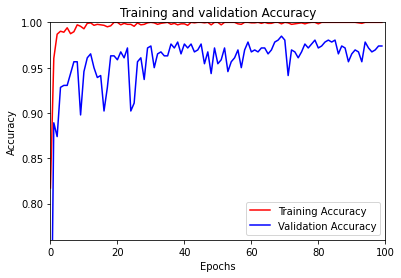

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc=History[0].history['accuracy']
val_acc=History[0].history['val_accuracy']
loss=History[0].history['loss']
val_loss=History[0].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.760,1.00))
plt.xlim([0,100])
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

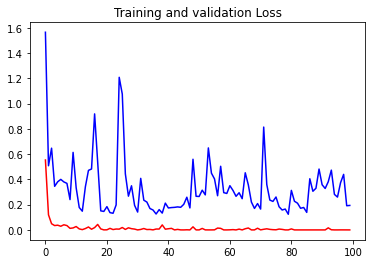

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss")
plt.figure()

<Figure size 432x288 with 0 Axes>

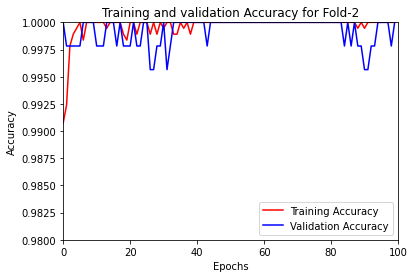

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=History[1].history['accuracy']
val_acc=History[1].history['val_accuracy']
loss=History[1].history['loss']
val_loss=History[1].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.98,1.00))
plt.xlim([0,100])
plt.title("Training and validation Accuracy for Fold-2")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

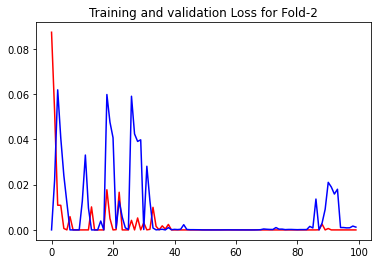

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss for Fold-2")
plt.figure()

<Figure size 432x288 with 0 Axes>

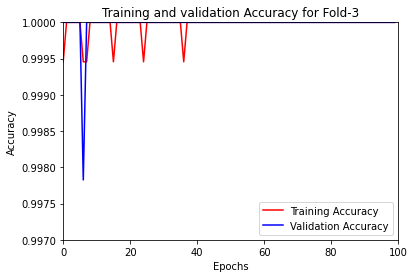

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=History[2].history['accuracy']
val_acc=History[2].history['val_accuracy']
loss=History[2].history['loss']
val_loss=History[2].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.997,1.00))
plt.xlim([0,100])
plt.title("Training and validation Accuracy for Fold-3")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

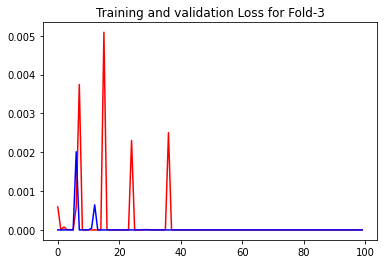

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'b')
plt.title("Training and validation Loss for Fold-3")
plt.figure()

<Figure size 432x288 with 0 Axes>

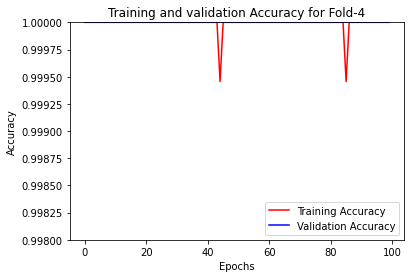

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=History[3].history['accuracy']
val_acc=History[3].history['val_accuracy']
loss=History[3].history['loss']
val_loss=History[3].history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim((0.998,1.00))
plt.title("Training and validation Accuracy for Fold-4")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.figure()

<Figure size 432x288 with 0 Axes>

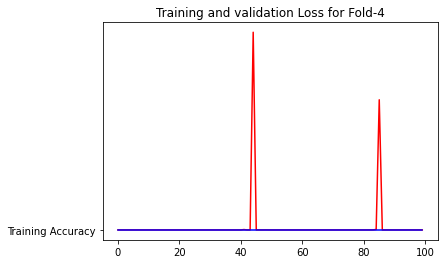

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs,loss,'r','Training Accuracy')
plt.plot(epochs,val_loss,'b','Training Accuracy')
plt.title("Training and validation Loss for Fold-4")
plt.figure()

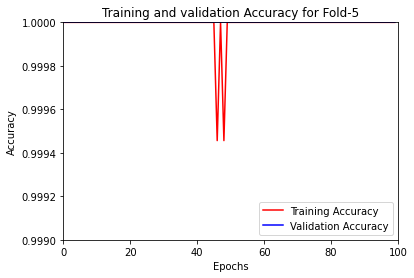

In [ ]:
acc=History[4].history['accuracy']
val_acc=History[4].history['val_accuracy']
loss=History[4].history['loss']
val_loss=History[4].history['val_loss']

epochs=range(len(acc))
plt.figure()
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylim([0.999,1.00])
plt.xlim([0,100])
plt.title("Training and validation Accuracy for Fold-5")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

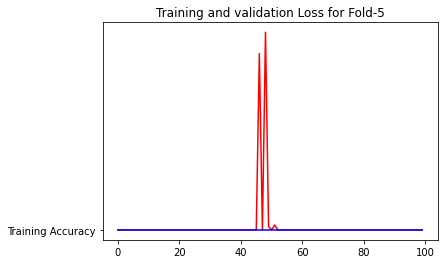

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs,loss,'r','Training Accuracy')
plt.plot(epochs,val_loss,'b','Training Accuracy')
plt.title("Training and validation Loss for Fold-5")
plt.figure()

In [ ]:
y_predict=model.predict(x_test)


In [ ]:
print(y_predict)

[[2.0808163e-17 1.0000000e+00 1.4680287e-19]
 [1.0000000e+00 2.7403069e-34 6.5428024e-28]
 [5.3794488e-06 9.9999464e-01 2.1923147e-12]
 ...
 [1.6562352e-15 1.0000000e+00 3.2164793e-26]
 [2.4647664e-20 1.0000000e+00 9.4565884e-30]
 [1.8551024e-13 1.0000000e+00 1.9643403e-21]]


In [ ]:
Y_predict=np.argmax(y_predict,axis=1)

In [ ]:
#print(Y_predict)
Y_predict=np.reshape(Y_predict,(766,1))
print(Y_predict)

[[1]
 [0]
 [1]
 [1]
 [2]
 [0]
 [1]
 [1]
 [1]
 [0]
 [2]
 [2]
 [2]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [2]
 [1]
 [1]
 [1]
 [0]
 [0]
 [2]
 [0]
 [2]
 [1]
 [0]
 [2]
 [0]
 [2]
 [0]
 [1]
 [0]
 [2]
 [0]
 [1]
 [2]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [2]
 [1]
 [0]
 [2]
 [2]
 [2]
 [0]
 [2]
 [1]
 [1]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [2]
 [0]
 [1]
 [1]
 [2]
 [0]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [1]
 [2]
 [2]
 [1]
 [0]
 [1]
 [2]
 [2]
 [1]
 [0]
 [2]
 [1]
 [1]
 [0]
 [2]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [2]
 [0]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [0]
 [2]
 [0]
 [2]
 [2]
 [0]
 [1]
 [1]
 [2]
 [1]
 [2]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [2]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [2]
 [2]
 [0]
 [0]
 [1]
 [2]
 [1]
 [2]
 [2]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [2]
 [2]
 [0]
 [0]
 [1]
 [1]
 [2]
 [0]
 [1]
 [2]
 [1]
 [1]
 [1]
 [2]
 [0]
 [2]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [2]
 [0]
 [1]
 [1]
 [2]
 [1]
 [1]
 [0]
 [0]
 [1]
 [2]
 [1]
 [0]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
metrics=confusion_matrix(y_test,Y_predict)
print(metrics)

[[184   1   0]
 [ 12 336   3]
 [  0   0 230]]


In [ ]:
from sklearn.metrics import precision_score

In [ ]:
prescore=precision_score(Y_dataset,Y_predict,average=None)


In [ ]:
print(prescore)

[0.97091413 1.         0.99252935]


In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recaller=recall_score(Y_dataset,Y_predict,average=None)

In [ ]:
print(recaller)

[1.         0.99929874 1.        ]


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
score=f1_score(Y_dataset,Y_predict,average=None)

In [ ]:
print(score)

[0.99929428 0.99964925 1.        ]


In [ ]:
#Printing ROC 
from sklearn.preprocessing import label_binarize

In [ ]:
lb=label_binarize(y_test,classes=[0,1,2])
lb=np.array(lb,dtype='float32')
print(lb)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
from sklearn.metrics import auc,roc_curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(lb[:, i], y_predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

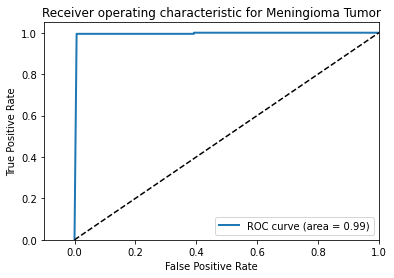

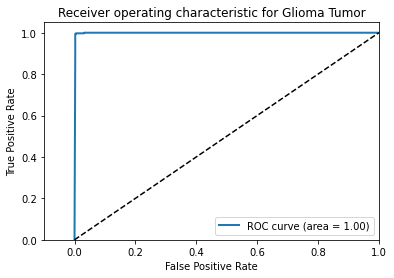

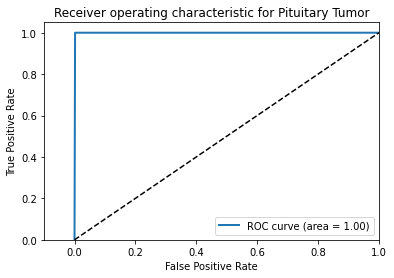

In [ ]:
for i in range(3):
    plt.figure()
    plt.plot(fpr[i], tpr[i], lw=2,label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if i==0:
      plt.title('Receiver operating characteristic for Meningioma Tumor')
    elif i==1:
      plt.title('Receiver operating characteristic for Glioma Tumor')
    else:
      plt.title('Receiver operating characteristic for Pituitary Tumor')

    plt.legend(loc="lower right")
    plt.show()

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 153603    
_________________________________________________________________
activation_189 (Activation)  (None, 3)                 0         
Total params: 21,956,387
Trainable params: 21,921,955
Non-trainable params: 34,432
_________________________________________________________________


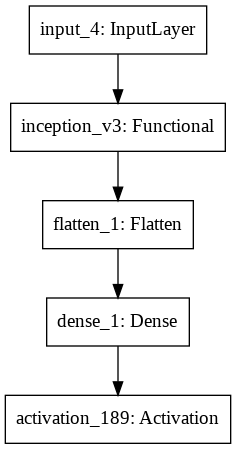

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file="Brain tumor model.png",show_layer_names=True)

In [ ]:
plot_model(Inception,to_file="Inception Network.png",show_shapes=True,show_layer_names=True)

In [ ]:


last_conv_layer_name = "mixed10.Concatenate"
classifier_layer_names = [
    "flatten_1"                     
    "dense_1",
    "activation_189",
]

In [ ]:
def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

In [ ]:
X_model=tf.keras.applications.MobileNetV2(include_top=False,input_shape=(224,224,3))
X_model=X_model(input_image)
X_model=tf.keras.layers.Flatten()(X_model)
X_model=tf.keras.layers.Dense(3)(X_model)
out=tf.keras.layers.Activation(activation='softmax')(X_model)

model=tf.keras.Model(inputs=input_image,outputs=out)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 188163    
_________________________________________________________________
activation_190 (Activation)  (None, 3)                 0         
Total params: 2,446,147
Trainable params: 2,412,035
Non-trainable params: 34,112
_________________________________________________________________


Fold 1
Epoch 1/100
58/58 [==============================] - 20s 187ms/step - loss: 0.9806 - accuracy: 0.7311 - val_loss: 0.6546 - val_accuracy: 0.7826
Epoch 2/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0435 - accuracy: 0.9866 - val_loss: 0.6556 - val_accuracy: 0.8348
Epoch 3/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0307 - accuracy: 0.9895 - val_loss: 0.5966 - val_accuracy: 0.8348
Epoch 4/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0146 - accuracy: 0.9946 - val_loss: 0.6366 - val_accuracy: 0.8652
Epoch 5/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.7011 - val_accuracy: 0.8739
Epoch 6/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0083 - accuracy: 0.9975 - val_loss: 0.8495 - val_accuracy: 0.8457
Epoch 7/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0118 - accuracy: 0.9950 - val_loss: 0.5719 - val_ac

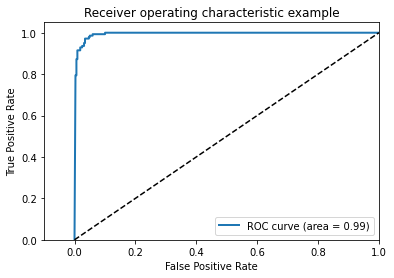

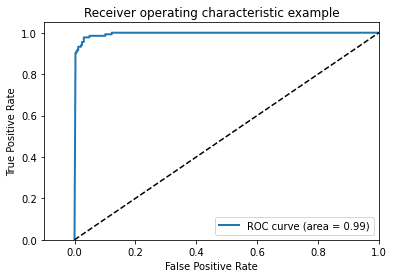

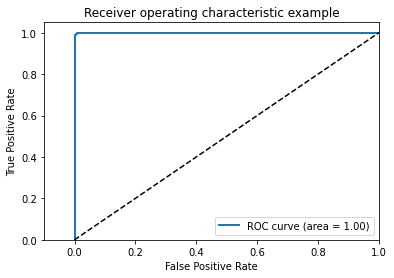

Fold 2
Epoch 1/100
58/58 [==============================] - 10s 165ms/step - loss: 0.1211 - accuracy: 0.9891 - val_loss: 0.0037 - val_accuracy: 0.9978
Epoch 2/100
58/58 [==============================] - 10s 165ms/step - loss: 0.0452 - accuracy: 0.9978 - val_loss: 0.0110 - val_accuracy: 0.9957
Epoch 3/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0126 - accuracy: 0.9978 - val_loss: 8.2192e-05 - val_accuracy: 1.0000
Epoch 4/100
58/58 [==============================] - 9s 164ms/step - loss: 0.0116 - accuracy: 0.9978 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/100
58/58 [==============================] - 10s 166ms/step - loss: 1.7316e-05 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 6/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 8.5778e-08 - val_accuracy: 1.0000
Epoch 7/100
58/58 [==============================] - 10s 166ms/step - loss: 2.9119e-06 - accuracy: 1.0000 - val_loss: 

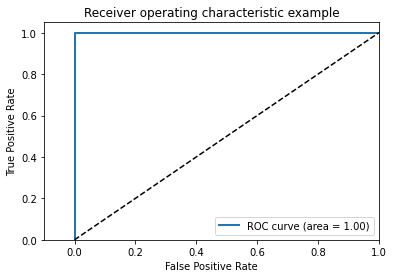

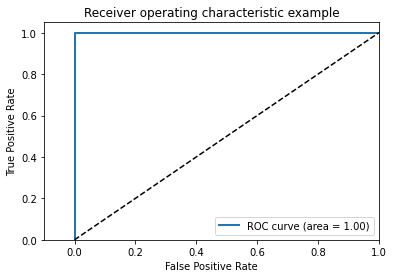

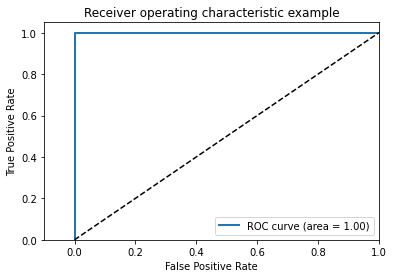

Fold 3
Epoch 1/100
58/58 [==============================] - 10s 167ms/step - loss: 1.1674e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
58/58 [==============================] - 10s 167ms/step - loss: 1.3620e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
58/58 [==============================] - 10s 168ms/step - loss: 7.1344e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/100
58/58 [==============================] - 10s 166ms/step - loss: 2.5943e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/100
58/58 [==============================] - 10s 167ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
58/58 [==============================] - 10s 167ms/step - loss: 2.803

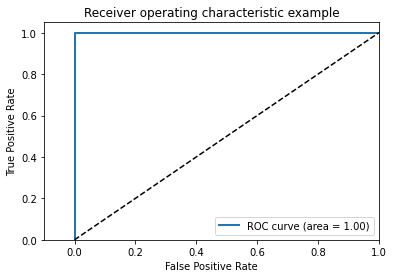

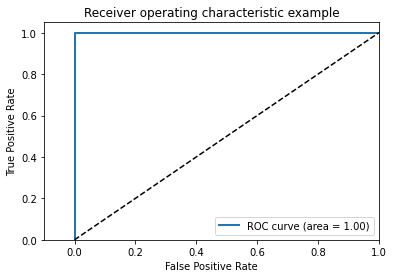

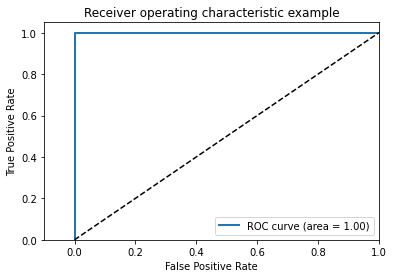

Fold 4
Epoch 1/100
58/58 [==============================] - 10s 173ms/step - loss: 1.9447e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
58/58 [==============================] - 10s 165ms/step - loss: 6.4823e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/100
58/58 [==============================] - 10s 166ms/step - loss: 8.4270e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/100
58/58 [==============================] - 10s 167ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/100
58/58 [==============================] - 10s 167ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
58/58 [==============================] - 10s 166ms/step - loss: 0.000

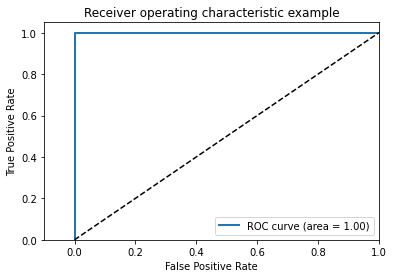

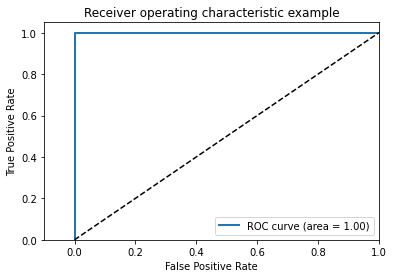

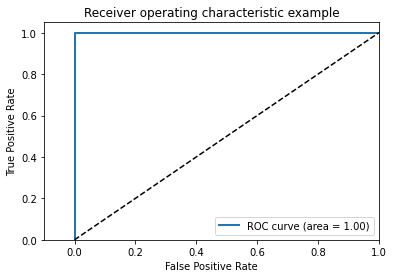

Fold 5
Epoch 1/100
58/58 [==============================] - 10s 167ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
58/58 [==============================] - 10s 165ms/step - loss: 5.1858e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/100
58/58 [==============================] - 10s 167ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/100
58/58 [==============================] - 10s 166ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/100
58/58 [==============================] - 10s 167ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
58/58 [==============================] - 10s 166ms/step - loss: 0.000

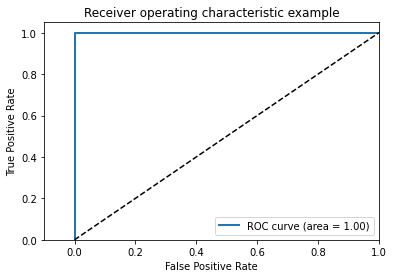

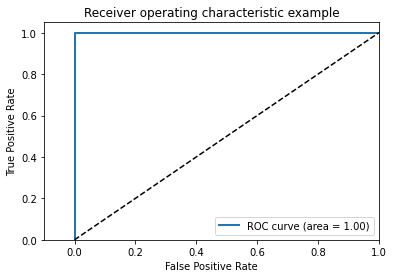

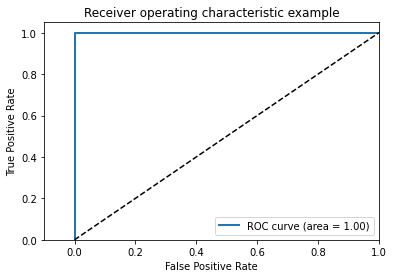

In [ ]:
History=[]
Prescore=[]
Recall=[]
F1=[]
Sensspeci=[]
Roc_auc=[]
for j,(train_idx,val_idx) in enumerate(folds):
    print("Fold "+str(j+1))
    
    x_train=X_dataset[train_idx]
    y_train=Y_dataset[train_idx]
    x_val=X_dataset[val_idx]
    y_val=Y_dataset[val_idx]
    history=model.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_val,y_val))
    y_predict=model.predict(x_val)
    Y_predict=np.argmax(y_predict,axis=1)
    l=len(y_val)
    Y_predict=np.reshape(Y_predict,(l,1))
    prescore=precision_score(y_val,Y_predict,average=None)
    recaller=recall_score(y_val,Y_predict,average=None)
    score=f1_score(y_val,Y_predict,average=None)
    sensitivity=sensitivity_specificity_support(y_val,Y_predict,average=None)
    lb=label_binarize(y_val,classes=[0,1,2])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
      fpr[i], tpr[i], _ = roc_curve(lb[:, i], y_predict[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
    
    print("Precision: ",prescore)
    print("Recall: ",recaller)
    print("F1-score ",score)
    print("Sensitivity ",sensitivity)
    History.append(history)
    Prescore.append(prescore)
    F1.append(score)
    Recall.append(recaller)
    Sensspeci.append(sensitivity)
    for i in range(3):
      plt.figure()
      plt.plot(fpr[i], tpr[i], lw=2,label='ROC curve (area = %0.2f)' % roc_auc[i])
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlim([-0.1, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver operating characteristic example')
      plt.legend(loc="lower right")
      plt.show()

In [ ]:
val_acc=History[0].history['val_accuracy']
val_acc1=History[1].history['val_accuracy']
val_acc2=History[2].history['val_accuracy']
val_acc3=History[3].history['val_accuracy']
val_acc4=History[4].history['val_accuracy']
Accuracvalid1=val_acc[99]
Accuracyvalid2=val_acc1[99]
Accuracyvalid3=val_acc2[99]
Accuracyvalid4=val_acc3[99]
Accuracyvalid5=val_acc4[99]
Mean_valid_Accuracy=(Accuracvalid1+Accuracyvalid2+Accuracyvalid3+Accuracyvalid4+Accuracyvalid5)/5.00
print("validation Accuracy for Fold-1 ",Accuracvalid1)
print("validation Accuracy for Fold-2",Accuracyvalid2)
print("Validation Accuracy for Fold-3 ",Accuracyvalid3)
print("Validation Accuracy for Fold-4  ",Accuracyvalid4)
print("Validation Accuracy for Fold-5  ",Accuracyvalid5)
print("Mean Validation Accuracy ",Mean_valid_Accuracy)

validation Accuracy for Fold-1  0.958695650100708
validation Accuracy for Fold-2 1.0
Validation Accuracy for Fold-3  1.0
Validation Accuracy for Fold-4   1.0
Validation Accuracy for Fold-5   1.0
Mean Validation Accuracy  0.9917391300201416


<Figure size 432x288 with 0 Axes>

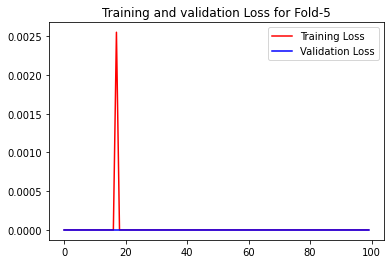

<Figure size 432x288 with 0 Axes>

In [ ]:
loss=History[4].history["loss"]
val_loss=History[4].history["val_loss"]
plt.plot(epochs,loss,color='r',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.title("Training and validation Loss for Fold-5")
plt.legend(loc="upper right")
plt.figure()

<Figure size 432x288 with 0 Axes>

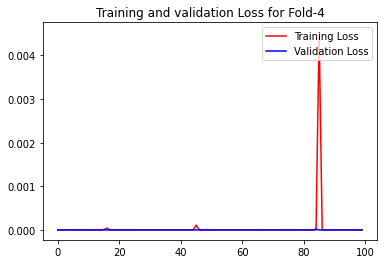

<Figure size 432x288 with 0 Axes>

In [ ]:
loss=History[3].history["loss"]
val_loss=History[3].history["val_loss"]
plt.plot(epochs,loss,color='r',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.title("Training and validation Loss for Fold-4")
plt.legend(loc="upper right")
plt.figure()

<Figure size 432x288 with 0 Axes>

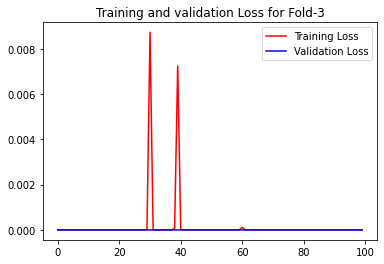

<Figure size 432x288 with 0 Axes>

In [ ]:
loss=History[2].history["loss"]
val_loss=History[2].history["val_loss"]
plt.plot(epochs,loss,color='r',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.title("Training and validation Loss for Fold-3")
plt.legend(loc="upper right")
plt.figure()

<Figure size 432x288 with 0 Axes>

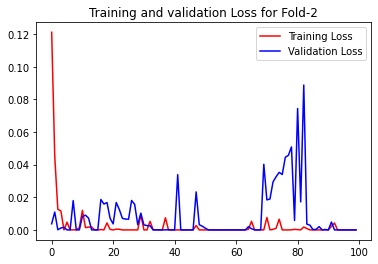

<Figure size 432x288 with 0 Axes>

In [ ]:
loss=History[1].history["loss"]
val_loss=History[1].history["val_loss"]
plt.plot(epochs,loss,color='r',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.title("Training and validation Loss for Fold-2")
plt.legend(loc="upper right")
plt.figure()

<Figure size 432x288 with 0 Axes>

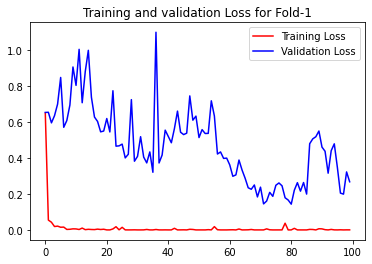

<Figure size 432x288 with 0 Axes>

In [ ]:
loss=History[0].history["loss"]
val_loss=History[0].history["val_loss"]
plt.plot(epochs,loss,color='r',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.title("Training and validation Loss for Fold-1")
plt.legend(loc="upper right")
plt.figure()